# Numerical Solutions for the Bethe Equations

## Goal

Solve the system of equations

$z_1^L = \frac{1 + z_1 z_2 - \Delta z_1}{1 + z_1 z_2 - \Delta z_2}\frac{1 + z_1 z_3 - \Delta z_1}{1 + z_1 z_3 - \Delta z_3}$


$z_2^L = \frac{1 + z_1 z_2 - \Delta z_2}{1 + z_1 z_2 - \Delta z_1} \frac{1 + z_2 z_3 - \Delta z_2}{1 + z_2 z_3 - \Delta z_3}$

$z_3^L = \frac{1 + z_1 z_3 - \Delta z_3}{1 + z_1 z_3 - \Delta z_1} \frac{1 + z_2 z_3 - \Delta z_3}{1 + z_2 z_3 - \Delta z_2}$

and check the identity

$\mathbf{1}((x_1 < x_2) = (y_1 < y_2) \mod L) = \sum_{z \in Sol} \frac{B(z)}{z_1^{y_1+1} z_2^{y_2+1}z_3^{y_3+1}}\sum_{\sigma \in S_N}  A_{\sigma}(z)\, z_{\sigma(1)}^{x_{1}} z_{\sigma(2)}^{x_{2}}z_{\sigma(3)}^{x_{3}}$

with 

$B_1(z_1, z_2) =\left( Lz_1^{L-1} + \frac{\Delta z_2 (z_1-z_2)}{(1 + z_1 z_2 -\Delta z_2)^2} -\frac{\Delta}{(1 + z_1 z_2 -\Delta  z_2)}   \right)^{-1}$

$B_2(z_1, z_2) =\left( Lz_2^{L-1} + \frac{\Delta z_1 (z_2-z_1)}{(1 + z_1 z_2 -\Delta z_1)^2} -\frac{\Delta}{(1 + z_1 z_2 -\Delta z_1 )}   \right)^{-1}$

$A(z_1, z_2) = -\frac{1 + z_1 z_2 - \Delta z_2}{1 + z_1 z_2 - \Delta z_1}$

so that $Sol$ is the set of all the solution to the system of equations above.

In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

/tmp/ipykernel_1637/3156728878.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


### Example: Finding roots

The code below finds the roots of the polynomial $z^2-1$.

In [2]:
coeff = [1, 0, -1]
sol = np.roots(coeff)
print(sol)

[-1.  1.]


## Numerical Solutions

We solve the system of equations by a fix point method: 

$(z_{1,n}, z_{2,n}) \rightarrow (z_1, z_2)$ as $n\rightarrow \infty$.

The sequence converges to a solution. We define the sequence as follows:

$z_{1, n+1} = A^{-1/L}(z_{1, n}, z_{2,n})$ and $z_{2, n+1} = A^{1/L}(z_{1, n}, z_{2,n})$.

Since there are $L$ roots of unity, we have to make a choice of which root to pick and we pick the one that is closest to the previous one. That is, we are looking for the roots of the polynomials

$z_{1, n+1}^{L} - A^{-1}(z_{1, n}, z_{2,n})$ and $z_{2, n+1}^L - A(z_{1, n}, z_{2,n})$

with respect to $z_{n+1}$.

### Defining the constant coefficient

We define the $A(z_1, z_2)$ and $A^{-1}(z_1, z_2)$ as the coefficients $c1$ and $c2$ for the pair of polynomial equations.

In [2]:
def c1(z1, z2, z3, d):
    return ((1 + z1*z2 - d*z1)* (1 + z1*z3 - d*z1))/((1+z1*z2 - d*z2)*(1+z1*z3 - d*z3))

def c2(z1, z2, z3, d):
    return ((1 + z1*z2 - d*z2)*(1 + z2*z3 - d*z2))/((1+ z1*z2 - d*z1)*(1+ z2*z3 - d*z3))

def c3(z1, z2, z3, d):
    return ((1 + z1*z3 - d*z3)*(1 + z2*z3 - d*z3))/((1+ z1*z3 - d*z1)*(1+ z2*z3 - d*z2))

In [4]:
c1(2, 3, 4, 0.1)

1.0385282887886151

In [5]:
c2(2,3,4, 0.1)

0.9695776664280601

In [8]:
c3(2,3,4, 0.1)

0.9695776664280601

In [9]:
c1(2, 3, 4, 0.1)*c2(2,3,4, 0.1)*c3(2,3,4, 0.1)

1.0000000000000002

### Defining the polynomial

A polynomial is defined as a list of coefficients. The polynimials that we are trying to solve

$z_1^L - c1 =0$  and $z_2^L - c_2=0$

corresponds to the list

[1, 0, ... , 0, -c1] and [1, 0, ... , -c2].

We define a functions below to give such lists.

In [3]:
def pol_coeff1(l, z1, z2, z3, d):
    coeff = [1]
    for i in range(l-1):
        coeff.append(0)
    coeff.append(-c1(z1, z2, z3, d))
    return coeff

def pol_coeff2(l, z1, z2, z3, d):
    coeff = [1]
    for i in range(l-1):
        coeff.append(0)
    coeff.append(-c2(z1, z2, z3, d))
    return coeff

def pol_coeff3(l, z1, z2, z3, d):
    coeff = [1]
    for i in range(l-1):
        coeff.append(0)
    coeff.append(-c3(z1, z2, z3, d))
    return coeff

In [12]:
pol_coeff1(5, 2, 3, 4, 0.1)
np.roots(pol_coeff1(5, 2, 3, 4, 0.1))

array([-0.81515709+0.59224629j, -0.81515709-0.59224629j,
        0.3113623 +0.95827463j,  0.3113623 -0.95827463j,
        1.00758958+0.j        ])

In [13]:
pol_coeff2(5, 2, 3, 4, 0.1)

[1, 0, 0, 0, 0, -0.9931139122315594]

In [14]:
pol_coeff3(5, 2, 3, 4, 0.1)

[1, 0, 0, 0, 0, -0.9695776664280601]

In [24]:
np.roots(pol_coeff1(3, 2, 3, 4, 0))

array([-0.5+0.8660254j, -0.5-0.8660254j,  1. +0.j       ])

### Finding close solutions

When we obtain the solutions of the polynomial equations, we obtain $L$ solutions but we are only interested in the solution that is closest to the previous element of the sequence $(z_{1,n}, z_{2,n})$. The code below solves the polynomials and returns the "closest" solutions.

In [4]:
def close_sol1(l, z1, z2, z3, d, s ):
    sols = np.roots(pol_coeff1(l, z1, z2, z3, d))
    sols = [x-s for x in sols]
    return min(sols, key=np.abs) + s

def close_sol2(l, z1, z2, z3, d, s ):
    sols = np.roots(pol_coeff2(l, z1, z2, z3, d))
    sols = [x-s for x in sols]
    return min(sols, key=np.abs) + s

def close_sol3(l, z1, z2, z3, d, s ):
    sols = np.roots(pol_coeff3(l, z1, z2, z3, d))
    sols = [x-s for x in sols]
    return min(sols, key=np.abs) + s


In [18]:
np.exp(2j*np.pi/3)

(-0.4999999999999998+0.8660254037844387j)

In [20]:
zsol1 = 1
zsol2 = np.exp(2j*np.pi/3)
zsol3 = np.exp(4j*np.pi/3)
close_sol1(3, zsol1, zsol2, zsol3, 0.2, zsol1)

(1-8.811293846231402e-17j)

In [22]:
zsol1 = 1
zsol2 = np.exp(2j*np.pi/3)
zsol3 = np.exp(4j*np.pi/3)
close_sol2(3, zsol1, zsol2, zsol3, 0.1, zsol1)

(0.9960640468835507-0.08863641749283345j)

In [23]:
zsol1 = 1
zsol2 = np.exp(2j*np.pi/3)
zsol3 = np.exp(4j*np.pi/3)
close_sol3(3, zsol1, zsol2, zsol3, 0.2, zsol1)

(0.983553825391881+0.18061526114090581j)

### Setting up a recursion

We now set up a recursion to give us the an arbitrary element of the sequence $(z_{1,n}, z_{2,n})$. The starting point of the recursion is label by an index $(k_1, k_2)$ so that $k_i \in \{1, \dots, L\}$ and 

$(z_{1,0}, z_{2,0}) = (e^{2 \pi i k_1/L}, e^{2\pi i k_2/L})$,

i.e. the solutions of the system of equations with $\Delta = 0$.

Notation: n= trails.

In [25]:
l=5
sol = np.roots(pol_coeff1(l, 0, 0,0, 0))
print(sol)
z= [sol[1], sol[2], sol[3]]
print(z)


[-0.80901699+0.58778525j -0.80901699-0.58778525j  0.30901699+0.95105652j
  0.30901699-0.95105652j  1.        +0.j        ]
[(-0.8090169943749472-0.5877852522924725j), (0.30901699437494734+0.9510565162951536j), (0.30901699437494734-0.9510565162951536j)]


In [17]:
d=.1
z= [close_sol1(l , z[0], z[1], d, z[0]), close_sol2(l, z[0], z[1], d, z[1])]
print(z)

[(-0.2911619922237325+0.9566737658597665j), (-0.2911619922237325-0.9566737658597665j)]


In [5]:
def sol_sys(l, d, k1, k2, k3, trails):
    sol = np.roots(pol_coeff1(l, 0, 0, 0, 0))
    z = [sol[k1], sol[k2], sol[k3]]
    for i in range(trails):
        z=[close_sol1(l , z[0], z[1], z[2], d, z[0]), close_sol2(l, z[0], z[1], z[2], d, z[1]), close_sol3(l, z[0], z[1], z[2], d, z[2])]
    return z

In [29]:
sol_sys(5, 0.1, 1, 2, 3, 30)

[(-0.8170397658879833-0.5765813220680236j),
 (0.34930573264629833+0.9370088073974713j),
 (0.3621843956879106-0.9321064657646053j)]

In [30]:
sol_sys(5, 0.1, 0, 1, 2, 30)

[(-0.8240701703639803+0.5664877353626314j),
 (-0.7879305511761455-0.6157641159756353j),
 (0.3665304094587564+0.930406072068533j)]

In [31]:
sol_sys(5, 10, 0, 1, 2, 30)

[(-0.8090169945378423+0.5877852520682691j),
 (-0.809016996193556+0.5877852497893727j),
 (-0.8090169923934447+0.5877852550197789j)]

### Checking the solution

We check the solution by showing that 

$z_{1,n}^L - A^{-1}(z_n)$ and $z_{2,n}^{L} - A(z_n)$

are close to zero.

Notation: n= trails.

In [6]:
l=5
d=0.1
k1=1
k2=2
k3=3
trails=30
z= sol_sys(l, d, k1, k2, k3, trails)
print(z[0]**l - c1(z[0], z[1], z[2], d))
print(z[1]**l- c2(z[0], z[1], z[2], d))
print(z[2]**l- c3(z[0], z[1], z[2], d))

(1.4432899320127035e-15+5.551115123125783e-17j)
(-3.4416913763379853e-15+1.0547118733938987e-15j)
(5.551115123125783e-16+9.992007221626409e-16j)


### Checking that all solutions are different

We check that all the solutions labelled by the indexes $(k_1, k_2)$ with $k_i \in \{1, \dots, L\}$ are distinct. This proves that we have found all the different solutions.

In [33]:
[(i1,i2, i3) for i1 in range(l) for i2 in range(i1+1, l) for i3 in range(i2+1, l)]

[(0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 4),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 4),
 (2, 3, 4)]

In [6]:
l=5
d=.1
trails=100
all_sol = [sol_sys(l, d, k1, k2, k3, trails) for k1 in range(l) for k2 in range(l) for k3 in range(l) if k1 != k2 if k1 != k3 if k2 !=k3]
print(all_sol)

[[(-0.8240701703639792+0.566487735362631j), (-0.7879305511761457-0.6157641159756359j), (0.3665304094587568+0.9304060720685329j)], [(-0.7879305511761457+0.6157641159756359j), (-0.8240701703639792-0.566487735362631j), (0.3665304094587568-0.9304060720685329j)], [(-0.7660397456371134+0.6427932078858857j), (-0.7660397456371134-0.6427932078858857j), (1.0000000000000002+0j)], [(-0.8240701703639792+0.566487735362631j), (0.3665304094587568+0.9304060720685329j), (-0.7879305511761457-0.6157641159756359j)], [(-0.8170397658879838+0.5765813220680238j), (0.36218439568791094+0.9321064657646053j), (0.34930573264629833-0.9370088073974713j)], [(-0.7904419010246062+0.6125370201911133j), (0.3584872446308612+0.9335346246588677j), (0.9965212883224657+0.08333859802116429j)], [(-0.7879305511761457+0.6157641159756359j), (0.3665304094587568-0.9304060720685329j), (-0.8240701703639792-0.566487735362631j)], [(-0.8170397658879838+0.5765813220680238j), (0.34930573264629833-0.9370088073974713j), (0.36218439568791094+0

In [15]:
diff =[abs(x[0]-y[0])+abs(x[1]-y[1]) + abs(x[2]-y[2]) for x in all_sol for y in all_sol if x != y]
diff.sort()
print(diff)

[1.180722971799172, 1.180722971799172, 1.180722971799172, 1.180722971799172, 1.180722971799172, 1.180722971799172, 1.180722971799172, 1.180722971799172, 1.180722971799172, 1.180722971799172, 1.180722971799172, 1.180722971799172, 1.1845919895489812, 1.1845919895489812, 1.1845919895489812, 1.1845919895489812, 1.1845919895489812, 1.1845919895489812, 1.1845919895489812, 1.1845919895489812, 1.1845919895489814, 1.1845919895489814, 1.1845919895489814, 1.1845919895489814, 1.1845919895489814, 1.1845919895489814, 1.1845919895489814, 1.1845919895489814, 1.1845919895489814, 1.1845919895489814, 1.1845919895489814, 1.1845919895489814, 1.1845919895489814, 1.1845919895489814, 1.1845919895489814, 1.1845919895489814, 1.1934121819613484, 1.1934121819613484, 1.1934121819613484, 1.1934121819613484, 1.1934121819613484, 1.1934121819613484, 1.1934121819613484, 1.1934121819613484, 1.1934121819613484, 1.1934121819613484, 1.1934121819613484, 1.1934121819613484, 1.1934121819613484, 1.1934121819613484, 1.193412181

### Plotting the solutions

We plot the solutions.

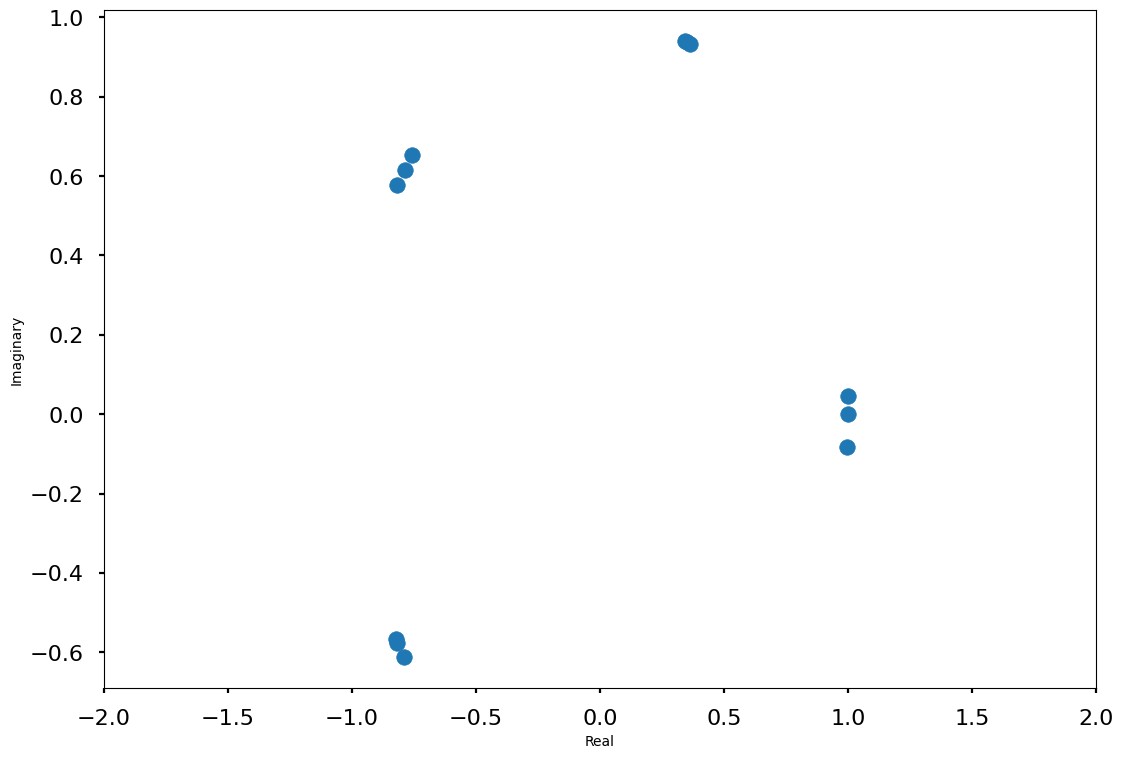

In [36]:
# import library
import matplotlib.pyplot as plt


# extract real part
x = [ele[1].real for ele in all_sol]
# extract imaginary part
y = [ele[1].imag for ele in all_sol]

# plot the complex numbers
plt.scatter(x, y)
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.xlim([-2,2])
plt.show()


## Checking the initial conditons

We check the identity

$\mathbf{1}((x_1 < x_2) = (y_1 < y_2) \mod L) = \sum_{z \in Sol} \frac{B_1(z_1, z_2)B_2(z_1, z_2)}{z_1^{y_1+1}z_2^{y_2+1}}\left(z_1^{x_1} z_2^{x_2} +A(z_1, z_2) z_1^{x_2} z_2^{x_1} \right)$

with 

$B_1(z_1, z_2) =\left( Lz_1^{L-1} + \frac{\Delta z_2 (z_1-z_2)}{(1 + z_1 z_2 -\Delta z_2)^2} -\frac{\Delta}{(1 + z_1 z_2 -\Delta  z_2)}   \right)^{-1}$

$B_2(z_1, z_2) =\left( Lz_2^{L-1} + \frac{\Delta z_1 (z_2-z_1)}{(1 + z_1 z_2 -\Delta z_1)^2} -\frac{\Delta}{(1 + z_1 z_2 -\Delta z_1 )}   \right)^{-1}$

$A(z_1, z_2) = -\frac{1 + z_1 z_2 - \Delta z_2}{1 + z_1 z_2 - \Delta z_1}$

so that $Sol$ is the set of all the solution to the system of equations above.

### Define $A_{\sigma}(z)$ function

In [7]:
def A12(z1, z2, z3, d):
    return (-1)* (1 + z1*z2 - d*z2)/(1 + z1 *z2 - d*z1)

def A13(z1, z2, z3, d):
    a = (1 + z1*z2 - d*z2)/(1 + z1 *z2 - d*z1)
    a = a*((1 + z1*z3 - d*z3)/(1 + z1 *z3 - d*z1))
    a = a*((1 + z2*z3 - d*z3)/(1 + z2 *z3 - d*z2))
    a = (-1)*a
    return a

def A23(z1, z2, z3, d):
    return (-1)* (1 + z2*z3 - d*z3)/(1 + z2 *z3 - d*z2)

def A123(z1, z2, z3, d):
    a= (1 + z1*z3 - d*z3)/(1 + z1 *z3 - d*z1)
    a = a* ((1 + z2*z3 - d*z3)/(1 + z2 *z3 - d*z2))
    return  a

def A132(z1, z2, z3, d):
    a= (1 + z1*z2 - d*z2)/(1 + z1 *z2 - d*z1)
    a= a*((1 + z1*z3 - d*z3)/(1 + z1 *z3 - d*z1))
    return  a

In [8]:
d=0.1
[A12(sol[0], sol[1], sol[2], d) for sol in all_sol]

[(-0.9983839992032427-0.05682772329540584j),
 (-0.9983839992032428-0.05682772329540584j),
 (-0.9980855268915525-0.06184885617060518j),
 (-0.9825173555256522+0.18617101302533412j),
 (-0.9825339815428593+0.18608324780467594j),
 (-0.981567078505107+0.19111794890838785j),
 (-0.9930076584805182-0.1180499478993459j),
 (-0.9930139114902885-0.11799733720197834j),
 (-0.9932955737069238-0.11560234969166278j),
 (-0.9590368087870819-0.2832814843781549j),
 (-0.9403837448505172-0.3401152928359995j),
 (-0.9556591586597896-0.29447507953927815j),
 (-0.9983839992032428+0.05682772329540584j),
 (-0.9983839992032427+0.05682772329540584j),
 (-0.9980855268915525+0.06184885617060518j),
 (-0.9930076584805182+0.1180499478993459j),
 (-0.9930139114902885+0.11799733720197834j),
 (-0.9932955737069238+0.11560234969166278j),
 (-0.9825173555256522-0.18617101302533412j),
 (-0.9825339815428593-0.18608324780467594j),
 (-0.981567078505107-0.19111794890838785j),
 (-0.9590368087870819+0.2832814843781549j),
 (-0.955659158659

In [9]:
d=0.1
[A13(sol[0], sol[1], sol[2], d) for sol in all_sol]

[(-0.9692255745115708+0.24617429945612732j),
 (-0.9350317237169895-0.354564064229351j),
 (-0.9980855268915532-0.061848856170605204j),
 (-0.9999270454765677+0.012079061408151334j),
 (-0.9996573305084263-0.02617673701527344j),
 (-0.9748217904282565-0.2229853737495999j),
 (-0.9999270454765679+0.012079061408151293j),
 (-0.9865849786135308+0.16324852211931062j),
 (-0.9426640471769329-0.33374315597478044j),
 (-0.804290125655143-0.5942368162388079j),
 (-0.9964234540208403-0.0845002974975735j),
 (-0.8826792095905626-0.4699759706161386j),
 (-0.9350317237169895+0.354564064229351j),
 (-0.9692255745115708-0.24617429945612732j),
 (-0.9980855268915532+0.061848856170605204j),
 (-0.9999270454765679-0.012079061408151293j),
 (-0.9865849786135308-0.16324852211931062j),
 (-0.9426640471769329+0.33374315597478044j),
 (-0.9999270454765677-0.012079061408151334j),
 (-0.9996573305084263+0.02617673701527344j),
 (-0.9748217904282565+0.2229853737495999j),
 (-0.804290125655143+0.5942368162388079j),
 (-0.88267920959

In [10]:
d=0.1
[A23(sol[0], sol[1], sol[2], d) for sol in all_sol]

[(-0.9930076584805182+0.1180499478993459j),
 (-0.9825173555256522-0.18617101302533412j),
 (-0.9590368087870819+0.2832814843781549j),
 (-0.9930076584805183-0.11804994789934586j),
 (-0.9954831973491228-0.09493789441296385j),
 (-0.9975413840770596-0.07007986196921466j),
 (-0.9825173555256524+0.18617101302533415j),
 (-0.9954831973491229+0.09493789441296384j),
 (-0.9972264586685702+0.07442707928800146j),
 (-0.9590368087870814-0.2832814843781548j),
 (-0.9975413840770595+0.07007986196921465j),
 (-0.9972264586685704-0.07442707928800148j),
 (-0.9825173555256522+0.18617101302533412j),
 (-0.9930076584805182-0.1180499478993459j),
 (-0.9590368087870819-0.2832814843781549j),
 (-0.9825173555256524-0.18617101302533415j),
 (-0.9954831973491229-0.09493789441296384j),
 (-0.9972264586685702-0.07442707928800146j),
 (-0.9930076584805183+0.11804994789934586j),
 (-0.9954831973491228+0.09493789441296385j),
 (-0.9975413840770596+0.07007986196921466j),
 (-0.9590368087870814+0.2832814843781548j),
 (-0.99722645866

In [11]:
d=0.1
[A123(sol[0], sol[1], sol[2], d) for sol in all_sol]

[(0.9536697802389896-0.30085536435123944j),
 (0.9536697802389896+0.30085536435123944j),
 (1.0000000000000007+0j),
 (0.9846944475389666+0.17428954353583312j),
 (0.977326244882219+0.21173901639617726j),
 (0.9142364696261875+0.4051810429986148j),
 (0.9915092815101243-0.13003593610720646j),
 (0.960429717718348-0.2785224538945729j),
 (0.9749255185776976+0.22253142076122295j),
 (0.9396801228235472+0.3420544792431801j),
 (0.965760262577121-0.2594361486512051j),
 (0.9819366821325409+0.1892098102174887j),
 (0.9536697802389896-0.30085536435123944j),
 (0.9536697802389896+0.30085536435123944j),
 (1.0000000000000007+0j),
 (0.9915092815101243+0.13003593610720646j),
 (0.960429717718348+0.2785224538945729j),
 (0.9749255185776976-0.22253142076122295j),
 (0.9846944475389666-0.17428954353583312j),
 (0.977326244882219-0.21173901639617726j),
 (0.9142364696261875-0.4051810429986148j),
 (0.9396801228235472-0.3420544792431801j),
 (0.9819366821325409-0.1892098102174887j),
 (0.965760262577121+0.2594361486512051

In [12]:
d=0.1
[A132(sol[0], sol[1], sol[2], d) for sol in all_sol]

[(0.991509281510124-0.1300359361072064j),
 (0.9846944475389666+0.17428954353583317j),
 (0.9396801228235476+0.3420544792431802j),
 (0.991509281510124-0.1300359361072064j),
 (0.9976272399228493-0.06884686023282277j),
 (0.9880518622658061+0.1541217618413214j),
 (0.9846944475389666+0.17428954353583317j),
 (0.9976272399228493-0.06884686023282277j),
 (0.915210001148872+0.40297723731878854j),
 (0.9396801228235476+0.3420544792431802j),
 (0.9880518622658061+0.1541217618413214j),
 (0.915210001148872+0.40297723731878854j),
 (0.9846944475389666-0.17428954353583317j),
 (0.991509281510124+0.1300359361072064j),
 (0.9396801228235476-0.3420544792431802j),
 (0.9846944475389666-0.17428954353583317j),
 (0.9976272399228493+0.06884686023282277j),
 (0.915210001148872-0.40297723731878854j),
 (0.991509281510124+0.1300359361072064j),
 (0.9976272399228493+0.06884686023282277j),
 (0.9880518622658061-0.1541217618413214j),
 (0.9396801228235476-0.3420544792431802j),
 (0.915210001148872-0.40297723731878854j),
 (0.988

### Define B function

In [8]:
def F1(z1, z2, z3, l, d):
    f = - (l/z1)
    f =1/f
    return f

def F2(z1, z2, z3, l, d):
    f = -(l)/z2
    f = 1/f
    return f

def F3(z1, z2, z3, l, d):
    f = - (l/z3)
    f =1/f
    return f

def F12(z1, z2, z3, l, d):
    f = ((1 + z2*z2 - d*z2)*z1) + ((1+z1*z1 - d*z1)*z2)
    f = f/((1+z1*z2 - d*z1)*(1+z1*z2 -d*z2))
    f= 1 +(f*(d/l)) 
    f =1/f
    return f

def F13(z1, z2, z3, l, d):
    f = ((1 + z3*z3 - d*z3)*z1) + ((1+z1*z1 - d*z1)*z3)
    f = f/((1+z1*z3 - d*z1)*(1+z1*z3 -d*z3))
    f= 1 +(f*(d/l)) 
    f =1/f
    return f

def F23(z1, z2, z3, l, d):
    f = ((1 + z3*z3 - d*z3)*z2) + ((1+z2*z2 - d*z2)*z3)
    f = f/((1+z2*z3 - d*z2)*(1+z2*z3 -d*z3))
    f= 1 +(f*(d/l)) 
    f =1/f
    return f

def F(z1, z2, z3, l, d):
    f=F1(z1, z2, z3, l, d)
    f=f*F2(z1, z2, z3, l, d)
    f=f*F3(z1, z2, z3, l, d)
    f=f*F12(z1, z2, z3, l, d)
    f=f*F13(z1, z2, z3, l, d)
    f=f*F23(z1, z2, z3, l, d)
    return f

In [24]:
l=5
d=0.1
[F(sol[0], sol[1], sol[2], l,d) for sol in all_sol]

[(-0.002665821958573715-0.008204556354942617j),
 (-0.0026658219585737144+0.008204556354942617j),
 (-0.00792464148473186-1.2037062152420224e-35j),
 (-0.002665821958573716-0.008204556354942619j),
 (0.0068372786620397915-0.004967573723795505j),
 (0.006607029115576785+0.0048002876362361864j),
 (-0.0026658219585737144+0.008204556354942619j),
 (0.0068372786620397915-0.004967573723795505j),
 (-0.002407118407420153-0.007408348694548522j),
 (-0.007924641484731862-2.407412430484045e-35j),
 (0.0066070291155767855+0.004800287636236186j),
 (-0.002407118407420153-0.007408348694548524j),
 (-0.0026658219585737144-0.008204556354942617j),
 (-0.002665821958573715+0.008204556354942617j),
 (-0.00792464148473186+1.2037062152420224e-35j),
 (-0.0026658219585737144-0.008204556354942619j),
 (0.0068372786620397915+0.004967573723795505j),
 (-0.002407118407420153+0.007408348694548522j),
 (-0.002665821958573716+0.008204556354942619j),
 (0.0068372786620397915+0.004967573723795505j),
 (0.006607029115576785-0.00480028

### Alternate definition of B

In [35]:
def W (z1, z2,d):
    return (d* (1 + z2*z2 - d*z2))/((1 + z1*z2 -d*z1)*(1 +z1*z2 -d*z2))

def B(z1, z2, z3, l, d):
    b= (l/z1) + W(z1, z2, d) + W(z1, z3, d)
    b =(-1)*b
    return b

def Coeff(z1, z2, z3, l, d):
    b3=B(z1, z2, z3, l ,d)*B(z2, z1, z3, l, d) - W(z1, z2, d)*W(z2, z1, d)
    b3 = b3/z3
    b2=B(z1, z2, z3, l ,d)*W(z3, z2, d) - W(z3, z1, d)*W(z1, z2, d)
    b2 = b2/z2
    b1=B(z2, z1, z3, l ,d)*W(z3, z1, d) - W(z3, z2, d)*W(z2, z1, d)
    b1 = b1/z1
    b = (-l)*(b3 - b2 - b1)
    b =(1/b)
    return b

In [11]:
l=5
d=0.1
[Coeff(sol[0], sol[1], sol[2], l,d) for sol in all_sol]

[(-0.0022309406890719946-0.006866129431171302j),
 (-0.0022309406890719946+0.006866129431171302j),
 (-0.006014706165225444-0j),
 (-0.002650239975171284-0.008156599941148422j),
 (0.0067008912999462844-0.004868482504952106j),
 (0.005448633955110848+0.003958664287922091j),
 (-0.0027948085289794602+0.008601536199197075j),
 (0.005887562856320806-0.004277564801421787j),
 (-0.0020878767503230873-0.006425823902120321j),
 (-0.009499604583981735-3.1967682162017255e-18j),
 (0.005775263451239422+0.004195974507760455j),
 (-0.0024237472584112698-0.00745952703548602j),
 (-0.0022309406890719946-0.006866129431171302j),
 (-0.0022309406890719946+0.006866129431171302j),
 (-0.006014706165225444-0j),
 (-0.0027948085289794602-0.008601536199197075j),
 (0.005887562856320806+0.004277564801421787j),
 (-0.0020878767503230873+0.006425823902120321j),
 (-0.002650239975171284+0.008156599941148422j),
 (0.0067008912999462844+0.004868482504952106j),
 (0.005448633955110848-0.003958664287922091j),
 (-0.009499604583981735+3

In [36]:
def Coeff2(z1, z2, z3, l, d):
    term1= (l**3)/(z1*z2*z3)
    term2 = (W(z3, z1,d) + W(z3,z2,d))/(z1*z2)
    term2 = term2 + (W(z2, z1,d) + W(z2,z3,d))/(z1*z3)
    term2 = term2 + (W(z1, z2,d) + W(z1,z3,d))/(z2*z3)
    term2 = (term2)*(l**2)
    term3 = (W(2,3,d)*W(3,1,d) +W(3,2,d)*W(2,1,d) + W(2,1,d)*W(3,1,d))/(z1)
    term3 = term3 + (W(1,3,d)*W(3,2,d) +W(2,3,d)*W(3,2,d) + W(1,2,d)*W(3,2,d))/(z2)
    term3 = term3 + (W(1,2,d)*W(2,3,d) +W(2,1,d)*W(1,3,d) + W(2,3,d)*W(2,3,d))/(z3)
    term3 = l*term3
    term = term1 + term2 +term3
    term =(1/term)
    return term

In [23]:
l=5
d=0.1
[Coeff2(sol[0], sol[1], sol[2], l,d) for sol in all_sol]

[(0.0026688083180608567+0.008215521555960408j),
 (0.002668613740016073-0.008215270190713577j),
 (0.00792242866741308-1.4531421375050995e-07j),
 (0.0026687918644435825+0.008216766668319346j),
 (-0.00683827838075377+0.004968157366138116j),
 (-0.0065965722275167235-0.004792712427428016j),
 (0.0026681301223718612-0.008215911581760547j),
 (-0.006837182678532816+0.004968521644880261j),
 (0.0024081159581634034+0.007408211443973626j),
 (0.007923387258187054-4.943043280490861e-07j),
 (-0.006596923703299866-0.004792212501814844j),
 (0.002408141801515788+0.007408830683478096j),
 (0.002668613740016073+0.008215270190713577j),
 (0.0026688083180608567-0.008215521555960408j),
 (0.00792242866741308+1.4531421375050995e-07j),
 (0.0026681301223718612+0.008215911581760547j),
 (-0.006837182678532816-0.004968521644880261j),
 (0.0024081159581634034-0.007408211443973626j),
 (0.0026687918644435825-0.008216766668319346j),
 (-0.00683827838075377-0.004968157366138116j),
 (-0.0065965722275167235+0.00479271242742801

In [37]:
l=5
d=0.1
[Coeff(sol[0], sol[1], sol[2], l,d)-Coeff2(sol[0], sol[1], sol[2], l,d) for sol in all_sol]

[(-0.0053367220511183755-0.016426515730795316j),
 (-0.005336527473073591+0.016426264365548483j),
 (-0.015881736710269385+1.4531421375050995e-07j),
 (-0.005336705597501102-0.016427760843154254j),
 (0.013674433846469804-0.009934915040037112j),
 (0.013217677199550628+0.009603226771998397j),
 (-0.005336043855429381+0.01642690575659546j),
 (0.013673338144248851-0.009935279318779258j),
 (-0.0048148728245654224-0.014815447429682622j),
 (-0.015882695301043352+4.943043280496062e-07j),
 (0.013218028675333771+0.009602726846385223j),
 (-0.004814898667917806-0.01481606666918709j),
 (-0.005336527473073591-0.016426264365548483j),
 (-0.0053367220511183755+0.016426515730795316j),
 (-0.015881736710269385-1.4531421375050995e-07j),
 (-0.005336043855429381-0.01642690575659546j),
 (0.013673338144248851+0.009935279318779258j),
 (-0.0048148728245654224+0.014815447429682622j),
 (-0.005336705597501102+0.016427760843154254j),
 (0.013674433846469804+0.009934915040037112j),
 (0.013217677199550628-0.009603226771998

In [38]:
l=5
d=0.1
[Coeff(sol[0], sol[1], sol[2], l,d)-F(sol[0], sol[1], sol[2], l,d) for sol in all_sol]

[(-2.091774483803984e-06-6.437819892290975e-06j),
 (-2.0917744838044178e-06+6.437819892290975e-06j),
 (-3.46665581244434e-05+1.2037062152420224e-35j),
 (-2.0917744838035504e-06-6.437819892290975e-06j),
 (-1.1231963237580411e-06+8.160498965095048e-07j),
 (1.407585645712018e-05+1.0226708334194583e-05j),
 (-2.091774483805719e-06+6.437819892290975e-06j),
 (-1.1231963237563064e-06+8.160498965086374e-07j),
 (3.615410181338763e-07+1.1127088395262996e-06j),
 (-3.4666558124438196e-05+5.200452326637085e-19j),
 (1.4075856457119312e-05+1.0226708334193715e-05j),
 (3.6154101813474365e-07+1.112708839529769e-06j),
 (-2.0917744838044178e-06-6.437819892290975e-06j),
 (-2.091774483803984e-06+6.437819892290975e-06j),
 (-3.46665581244434e-05-1.2037062152420224e-35j),
 (-2.091774483805719e-06-6.437819892290975e-06j),
 (-1.1231963237563064e-06-8.160498965086374e-07j),
 (3.615410181338763e-07-1.1127088395262996e-06j),
 (-2.0917744838035504e-06+6.437819892290975e-06j),
 (-1.1231963237580411e-06-8.1604989650950

In [39]:
l=5
d=0.1
[Coeff2(sol[0], sol[1], sol[2], l,d)-F(sol[0], sol[1], sol[2], l,d) for sol in all_sol]

[(0.005334630276634571+0.016420077910903025j),
 (0.005334435698589787-0.016419826545656192j),
 (0.01584707015214494-1.4531421375050995e-07j),
 (0.005334613823017299+0.016421323023261963j),
 (-0.013675557042793562+0.009935731089933621j),
 (-0.013203601343093507-0.009593000063664203j),
 (0.005333952080945576-0.016420467936703168j),
 (-0.013674461340572607+0.009936095368675766j),
 (0.004815234365583556+0.014816560138522148j),
 (0.015848028742918914-4.943043280490861e-07j),
 (-0.013203952818876652-0.00959250013805103j),
 (0.0048152602089359415+0.01481717937802662j),
 (0.005334435698589787+0.016419826545656192j),
 (0.005334630276634571-0.016420077910903025j),
 (0.01584707015214494+1.4531421375050995e-07j),
 (0.005333952080945576+0.016420467936703168j),
 (-0.013674461340572607-0.009936095368675766j),
 (0.004815234365583556-0.014816560138522148j),
 (0.005334613823017299-0.016421323023261963j),
 (-0.013675557042793562-0.009935731089933621j),
 (-0.013203601343093507+0.009593000063664203j),
 (0.

In [11]:
def Coeff3(z1, z2, z3, l, d):
    term1= (l**3)/(z1*z2*z3)
    term2 = (W(z3, z1,d) + W(z3,z2,d))/(z1*z2)
    term2 = term2 + (W(z2, z1,d) + W(z2,z3,d))/(z1*z3)
    term2 = term2 + (W(z1, z2,d) + W(z1,z3,d))/(z2*z3)
    term2 = (term2)*(l**2)
    term3 = (W(2,3,d)*W(3,1,d) +W(3,2,d)*W(2,1,d) + W(2,1,d)*W(3,1,d))/(z1)
    term3 = term3 + (W(1,3,d)*W(3,2,d) +W(2,3,d)*W(3,2,d) + W(1,2,d)*W(3,2,d))/(z2)
    term3 = term3 + (W(1,2,d)*W(2,3,d) +W(2,1,d)*W(1,3,d) + W(2,3,d)*W(2,3,d))/(z3)
    term3 = l*term3
    term = term1 + term2 +term3
    term = term/A13(z1,z2,z3,d)
    term =(1/term)
    return term

In [15]:
l=5
d=0.1
[Coeff3(sol[0], sol[1], sol[2], l,d) for sol in all_sol]

[(-0.004609127539039059-0.007305701581906606j),
 (-0.0054080780928237124+0.006735343713705331j),
 (-0.007907270378293637-0.0004898481151591152j),
 (-0.002767847993168053-0.008183930717206717j),
 (0.006965985260201691-0.004787451115369185j),
 (0.005361777577612778+0.006142979633132189j),
 (-0.002568694969690301+0.008247540701439607j),
 (0.005934357911032595-0.0060180287884852935j),
 (0.00020239553224657382-0.007787146801949321j),
 (-0.006372995867331779-0.004707970854042094j),
 (0.006168386120279062+0.0053325149489578385j),
 (0.0013563556896542966-0.007671389592231419j),
 (-0.0054080780928237124-0.006735343713705331j),
 (-0.004609127539039059+0.007305701581906606j),
 (-0.007907270378293637+0.0004898481151591152j),
 (-0.002568694969690301-0.008247540701439607j),
 (0.005934357911032595+0.0060180287884852935j),
 (0.00020239553224657382+0.007787146801949321j),
 (-0.002767847993168053+0.008183930717206717j),
 (0.006965985260201691+0.004787451115369185j),
 (0.005361777577612778-0.006142979633

In [12]:
def G1(z1, z2, z3, l, d):
    f = - (l/z1)
    f =1/f
    return f

def G2(z1, z2, z3, l, d):
    f = -(l)/z2
    f = 1/f
    return f

def G3(z1, z2, z3, l, d):
    f = - (l/z3)
    f =1/f
    return f

def G12(z1, z2, z3, l, d):
    f = ((1 + z2*z2 - d*z2)*z1) + ((1+z1*z1 - d*z1)*z2)
    f = f/((1+z1*z2 - d*z1)*(1+z1*z2 -d*z2))
    f= 1 -(f*(d/l)) 
    f =1/f
    return f

def G13(z1, z2, z3, l, d):
    f = ((1 + z3*z3 - d*z3)*z1) + ((1+z1*z1 - d*z1)*z3)
    f = f/((1+z1*z3 - d*z1)*(1+z1*z3 -d*z3))
    f= 1 -(f*(d/l)) 
    f =1/f
    return f

def G23(z1, z2, z3, l, d):
    f = ((1 + z3*z3 - d*z3)*z2) + ((1+z2*z2 - d*z2)*z3)
    f = f/((1+z2*z3 - d*z2)*(1+z2*z3 -d*z3))
    f= 1 -(f*(d/l)) 
    f =1/f
    return f

def G(z1, z2, z3, l, d):
    f=G1(z1, z2, z3, l, d)
    f=f*G2(z1, z2, z3, l, d)
    f=f*G3(z1, z2, z3, l, d)
    f=f*G12(z1, z2, z3, l, d)
    f=f*G13(z1, z2, z3, l, d)
    f=f*G23(z1, z2, z3, l, d)
    return f

### Define a function for the terms inside the summation

In [40]:
def term_ic(x1, x2, x3, y1, y2, y3, l, d, sol):
    #term1 = F(sol[0], sol[1], sol[2], l, d)
    term1 = Coeff(sol[0], sol[1], sol[2], l, d)
    #term1 = Coeff2(sol[0], sol[1], sol[2], l, d)
    #term1 = Coeff3(sol[0], sol[1], sol[2], l, d)
    #term1 = G(sol[0], sol[1], sol[2], l, d)
    term1 = term1/((sol[0]**(y1+1)) *(sol[1]**(y2+1))*(sol[2]**(y3+1)))
    term2 = (sol[0]**x1)*(sol[1]**x2)*(sol[2]**x3)
    term2 = term2 + A12(sol[0], sol[1], sol[2], d)*(sol[1]**x1)*(sol[0]**x2)*(sol[2]**x3)
    term2 = term2 + A13(sol[0], sol[1], sol[2], d)*(sol[2]**x1)*(sol[1]**x2)*(sol[0]**x3)
    term2 = term2 + A23(sol[0], sol[1], sol[2], d)*(sol[0]**x1)*(sol[2]**x2)*(sol[1]**x3)
    term2 = term2 + A123(sol[0], sol[1], sol[2], d)*(sol[2]**x1)*(sol[0]**x2)*(sol[1]**x3)
    term2 = term2 + A132(sol[0], sol[1], sol[2], d)*(sol[1]**x1)*(sol[2]**x2)*(sol[0]**x3)
    return term1*term2

In [17]:
l=5
d=0.1
[term_ic(1, 2, 3, 1, 2, 3, l, d, sol) for sol in all_sol]

[(1.4034662392160726-3.597510294632234j),
 (-0.6181281331120164+0.11041841547472112j),
 (0.9385980246373181+3.109349264536479j),
 (0.9015338031914364-3.7266664367858424j),
 (-2.2491750163232918+2.017488643802391j),
 (0.651306081758009+1.3309249529243803j),
 (-0.627862712382933+0.8564752597296548j),
 (-2.0268711144362808-2.048757451051394j),
 (1.9723488904177906-1.282985760286985j),
 (3.284670857201998+0.04659757363889483j),
 (-0.07097471278748496+0.8859143928533458j),
 (-0.8430024268468468-2.459233546006197j),
 (-0.6181281331120164-0.11041841547472112j),
 (1.4034662392160726+3.597510294632234j),
 (0.9385980246373181-3.109349264536479j),
 (-0.627862712382933-0.8564752597296548j),
 (-2.0268711144362808+2.048757451051394j),
 (1.9723488904177906+1.282985760286985j),
 (0.9015338031914364+3.7266664367858424j),
 (-2.2491750163232918-2.017488643802391j),
 (0.651306081758009-1.3309249529243803j),
 (3.284670857201998-0.04659757363889483j),
 (-0.8430024268468468+2.459233546006197j),
 (-0.07097471

### Define a function for the summation

In [16]:
def F_ic(x1, x2, x3, y1, y2, y3, l, d, all_sol):
    terms = [term_ic(x1, x2, x3, y1, y2, y3, l, d, sol) for sol in all_sol]
    return sum(terms)

In [34]:
l=5
d=0
y1=1
y2=2
y3=3
trails=100
all_sol = [sol_sys(l, d, k1, k2, k3, trails) for k1 in range(l) for k2 in range(l) for k3 in range(l) if k1 != k2 if k1 != k3 if k2 != k3]

In [35]:
x1=1
x2=2
x3=3
F_ic(x1, x2, x3, y1, y2, y3, l,d, all_sol)

(-2.4868995751603507e-14+1.509903313490213e-14j)

### We check the identity

We set the parameters. The last list is a list of all possible coordinates.

In [14]:
l=5
d=0.1
y1=1
y2=2
y3=3
X=[(i1+1, i2+1, i3+1) for i1 in range(l) for i2 in range(l) for i3 in range(l) if i1<i2 if i2 <i3]
print(X)

[(1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 3, 4), (1, 3, 5), (1, 4, 5), (2, 3, 4), (2, 3, 5), (2, 4, 5), (3, 4, 5)]


100 trails

In [43]:
d=0.1
trails=200
all_sol = [sol_sys(l, d, k1, k2, k3, trails) for k1 in range(l) for k2 in range(l) for k3 in range(l) if k1 != k2 if k1 != k3 if k2 != k3]
values= [F_ic(x[0], x[1], x[2], y1, y2, y3, l,d, all_sol)  for x in X]
print(values)
print(sum(values))
mag = [abs(x**2) for x in values]
mag.sort()
print(mag)
print(sum(mag))

[(-1.0000000000000002-6.938893903907228e-18j), (2.7755575615628914e-17-1.734723475976807e-18j), (-4.996003610813204e-16+6.938893903907228e-18j), (1.8735013540549517e-16+2.949029909160572e-17j), (1.1102230246251565e-16+1.734723475976807e-18j), (-5.204170427930421e-16+3.469446951953614e-18j), (-1.491862189340054e-16-4.423544863740858e-17j), (1.0408340855860843e-16-3.469446951953614e-17j), (-1.1796119636642288e-15-6.938893903907228e-18j), (-7.251144129583054e-16+1.6479873021779667e-17j)]
(-1.0000000000000029-3.642919299551295e-17j)
[7.733812432929994e-34, 1.2037062152420224e-32, 1.2328960909616415e-32, 2.4213302835977807e-32, 3.5969750976969735e-32, 2.4964866904119545e-31, 2.7084593549160746e-31, 5.260624980946818e-31, 1.3915325330683876e-30, 1.0000000000000004]
1.0000000000000004


In [39]:
d=0.1
trails=100
all_sol = [sol_sys(l, d, k1, k2, k3, trails) for k1 in range(l) for k2 in range(l) for k3 in range(l) if k1 != k2 if k1 != k3 if k2 != k3]
values= [F_ic(x[0], x[1], x[2], y1, y2, y3, l,d, all_sol)  for x in X]
print(values)
print(sum(values))
mag = [abs(x**2) for x in values]
mag.sort()
print(mag)
print(sum(mag))

[(-1.0064742645366935-2.5153490401663703e-17j), (0.06811494738328772+0j), (-0.013178520418330576+9.540979117872439e-18j), (0.013206146796925201-1.0408340855860843e-17j), (-0.013143472826266434+2.0816681711721685e-17j), (-0.006749900181371015+0j), (-0.03772102827322654-5.984795992119984e-17j), (-0.0606636565951707+0j), (0.010949793315372276+0j), (0.01015130831695598+3.469446951953614e-18j)]
(-1.0355086470185175-6.158268339717665e-17j)
[4.556115245847246e-05, 0.00010304906054589966, 0.00011989797364937138, 0.00017275087793480414, 0.0001736734004163559, 0.00017440231322193777, 0.0014228759739895562, 0.0036800792314967976, 0.004639646057028054, 1.012990445174678]
1.0235223812154193


In [19]:
d=0.1
trails=100
all_sol = [sol_sys(l, d, k1, k2, k3, trails) for k1 in range(l) for k2 in range(l) for k3 in range(l) if k1 != k2 if k1 != k3 if k2 != k3]
values= [F_ic(x[0], x[1], x[2], y1, y2, y3, l,d, all_sol) for x in X]
print(values)
print(sum(values))
mag = [abs(x**2) for x in values]
mag.sort()
print(mag)
print(sum(mag))

[(0.9990873846960623+9.540979117872439e-18j), (0.00016517151637536476+0j), (-0.00025894736704047683-1.1275702593849246e-17j), (0.0010990394050433977+1.734723475976807e-17j), (0.0009618687628582742+3.469446951953614e-18j), (-0.0008449607284986838+1.0408340855860843e-17j), (-0.0002597074296375526+8.413408858487514e-17j), (0.00016311477061023427+6.071532165918825e-17j), (-0.00021390172256991608+1.734723475976807e-18j), (-0.0008454934689871713-6.938893903907228e-18j)]
(0.9990535684342159+1.691355389077387e-16j)
[2.6606428391229345e-08, 2.7281629821737387e-08, 4.5753946918377345e-08, 6.705373889719543e-08, 6.744794900894435e-08, 7.139586327050263e-07, 7.148592060999608e-07, 9.251915169625069e-07, 1.2078876138381456e-06, 0.9981756022588175]
0.9981793982994802


In [21]:
d=0.1
trails=100
all_sol = [sol_sys(l, d, k1, k2, k3, trails) for k1 in range(l) for k2 in range(l) for k3 in range(l) if k1 != k2 if k1 != k3 if k2 != k3]
values= [F_ic(x[0], x[1], x[2], y1, y2, y3, l,d, all_sol) for x in X]
print(values)
print(sum(values))
mag = [abs(x**2) for x in values]
mag.sort()
print(mag)
print(sum(mag))

[(0.9765233799900417-9.540979117872439e-18j), (0.038624582219639714+0j), (0.035082071478605634-1.0408340855860843e-17j), (-0.012012764567381908+1.214306433183765e-17j), (-0.012130018477690942-5.204170427930421e-18j), (-0.003854443327998114-2.0816681711721685e-17j), (0.03509522414032395+6.938893903907228e-17j), (0.038619694612037-1.0408340855860843e-17j), (-0.015241656696354348+3.469446951953614e-18j), (-0.0038415390821208567+3.469446951953614e-18j)]
(1.0768645302891018+3.209238430557093e-17j)
[1.4757422519461954e-05, 1.4856733368749175e-05, 0.00014430651255134622, 0.00014713734826912367, 0.00023230809884952335, 0.001230751739229995, 0.0012316747574595767, 0.0014914808119269997, 0.0014918583516417084, 0.9535979116671753]
0.9595970434429918


In [50]:
d=0.1
trails=100
all_sol = [sol_sys(l, d, k1, k2, k3, trails) for k1 in range(l) for k2 in range(l) for k3 in range(l) if k1 != k2 if k1 != k3 if k2 != k3]
values= [F_ic(x[0], x[1], x[2], y1, y2, y3, l,d, all_sol) for x in X]
print(values)
print(sum(values))
mag = [abs(x**2) for x in values]
mag.sort()
print(mag)
print(sum(mag))

[(-0.9765639890665164+1.5612511283791264e-17j), (-0.038778608292290226-1.734723475976807e-18j), (-0.0348996815310372-1.5612511283791264e-17j), (0.012394236387912608-1.5612511283791264e-17j), (0.012394236387912858-1.0408340855860843e-17j), (0.003702539319585453-6.938893903907228e-18j), (-0.03489968153103714+8.673617379884035e-18j), (-0.038778608292289005+3.9898639947466563e-17j), (0.015207039536745487-6.938893903907228e-18j), (0.00370253931958537+2.6020852139652106e-18j)]
(-1.0765199777614283+9.540979117872439e-18j)
[1.3708797413075693e-05, 1.370879741307631e-05, 0.00015361709563945696, 0.00015361709563946316, 0.0002312540514721404, 0.0012179877709678148, 0.0012179877709678191, 0.0015037804610867856, 0.0015037804610868802, 0.9536772247415072]
0.9596866670431937


### Energy function

In [44]:
def E(z1, z2, z3, d):
    return np.real(z1 + (1/z1) +z2 +(1/z2) +z3 +(1/z3) - 6*d)

In [45]:
[E(sol[0],sol[1], sol[2],d) for sol in all_sol]

[-3.090940624162735,
 -3.090940624162735,
 -1.6641589825484526,
 -3.0909406241627355,
 -0.8110992751075486,
 0.5291332638574426,
 -3.090940624162735,
 -0.8110992751075485,
 0.5729066354128389,
 -1.6641589825484524,
 0.5291332638574426,
 0.5729066354128391,
 -3.090940624162735,
 -3.090940624162735,
 -1.6641589825484526,
 -3.090940624162735,
 -0.8110992751075485,
 0.5729066354128389,
 -3.0909406241627355,
 -0.8110992751075486,
 0.5291332638574426,
 -1.6641589825484524,
 0.5729066354128391,
 0.5291332638574426,
 -3.090940624162735,
 -0.8110992751075486,
 0.5291332638574426,
 -3.090940624162735,
 -0.8110992751075488,
 0.5729066354128389,
 -0.8110992751075489,
 -0.8110992751075489,
 2.764158982548453,
 0.5291332638574426,
 0.5729066354128389,
 2.764158982548453,
 -3.090940624162735,
 -0.8110992751075488,
 0.5729066354128389,
 -3.090940624162735,
 -0.8110992751075486,
 0.5291332638574426,
 -0.8110992751075489,
 -0.8110992751075489,
 2.764158982548453,
 0.5729066354128389,
 0.5291332638574426

### Wave Function

In [46]:
def Wave(x1, x2, x3, t, y1, y2, y3, l, d, all_sol):
    terms = [term_ic(x1, x2, x3, y1, y2, y3, l, d, sol)*np.exp(-1j*t*E(sol[0], sol[1], sol[2], d)) for sol in all_sol]
    return sum(terms)

In [48]:
l=5
d=0.1
y1=1
y2=2
y3=3
X= [(i1+1, i2+1, i3+1) for i1 in range(l) for i2 in range(l) for i3 in range(l) if i1<i2 if i2 < i3]

In [62]:
trails=100
all_sol = [sol_sys(l, d, k1, k2, trails) for k1 in range(l) for k2 in range(l) if k1 != k2]

In [52]:
values= [Wave(x[0], x[1],x[2],0.1, y1, y2, y3, l,d, all_sol) for x in X]
print(values)

[(-0.9892593552402651-0.039557883307457596j), (-0.004464832092874668+0.09890299677098216j), (0.00496953746876155+4.985120701590708e-05j), (0.004960077606932609-9.9977187718394e-05j), (0.004960077606932511-9.997718771836625e-05j), (1.4102324292414314e-05-0.0004973733842005548j), (0.004969537468761928+4.985120701593657e-05j), (-0.004464832092874713+0.09890299677098212j), (0.009914350066242479+0.00046383649676072156j), (1.4102324292206148e-05-0.0004973733842006242j)]


### Checking Prob adds to one

In [53]:
t=0.5
probs = [abs(Wave(x[0], x[1],x[2],0.1, y1, y2, y3, l,d, all_sol)**2) for x in X]
print(probs)
print(sum(probs))

[0.9801988980621513, 0.009801737495898471, 2.4698787796265895e-05, 2.4612365304858392e-05, 2.4612365304857423e-05, 2.475791588615611e-07, 2.4698787796269655e-05, 0.009801737495898464, 9.85094815317295e-05, 2.475791588616242e-07]
1.0


### Gap probability

In [54]:
def gap_conf3(x, l):
    return [(x, i2+1, i3 + 1) for i2 in range(l) for i3 in range(l) if x-1<i2 if i2<i3]

In [56]:
gap_conf3(1, l)

[(1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 3, 4), (1, 3, 5), (1, 4, 5)]

In [59]:
def Prob_gap3(x, t, y1, y2, y3, l, d, all_sol):
    X = gap_conf3(x, l)
    probs = [abs(Wave(x[0], x[1], x[2],t, y1, y2, y3, l,d, all_sol)**2) for x in X]
    return sum(probs)

In [68]:
[x+1 for x in range(l)]

[1, 2, 3, 4, 5]

In [61]:
t=0.5
y1=2
y2=3
y3=4
gap_probs = [Prob_gap3(x+1, t, y1,y2, y3, l, d, all_sol) for x in range(l)]
print(gap_probs)
print(sum(gap_probs))

[0.22074526946305004, 0.767749461906323, 0.01150526863062775, 0, 0]
1.0000000000000009


### Expected Position

In [62]:
k=5
l=2*k+1
d=0.1
y1=k
y2=k+1
y3=k+2
t=0.5

In [71]:
trails=100
all_sol = [sol_sys(l, d, k1, k2, trails) for k1 in range(l) for k2 in range(l) if k1 != k2]

In [63]:
gap_probs = [Prob_gap3(x+1, t, y1,y2, y3, l, d, all_sol) for x in range(l)]
print(gap_probs)
print(sum(gap_probs))

[0.03350591091434478, 0.026657044159945208, 0.007012790985095577, 0.004268030118646179, 0.013495478029552177, 0.008467336019990541, 0.006879731692299312, 0.001714281701473533, 8.512873508355025e-05, 0, 0]
0.10208573235643086


In [64]:
gap_avg = [(x+1-y1)*Prob_gap3(x+1, t, y1,y2, y3, l, d, all_sol) for x in range(l)]
print(gap_avg)
print(sum(gap_avg))

[-0.13402364365737912, -0.07997113247983562, -0.014025581970191154, -0.004268030118646179, 0.0, 0.008467336019990541, 0.013759463384598623, 0.005142845104420599, 0.000340514940334201, 0, 0]
-0.20457822877670812


### Plotting the probability

In [65]:
X = np.arange(1, l+1, 1)
T = np.arange(0, l, 0.01)


X1, T1 = np.meshgrid(X, T)

#Z = Prob_gap2(X1, T1, y1,y2, l, d, all_sol)

Z = [[Prob_gap3(x, t, y1,y2, y3, l, d, all_sol)for x in X ]for t in T]
Z = np.array(Z)

In [75]:
print(Z.ndim)

2


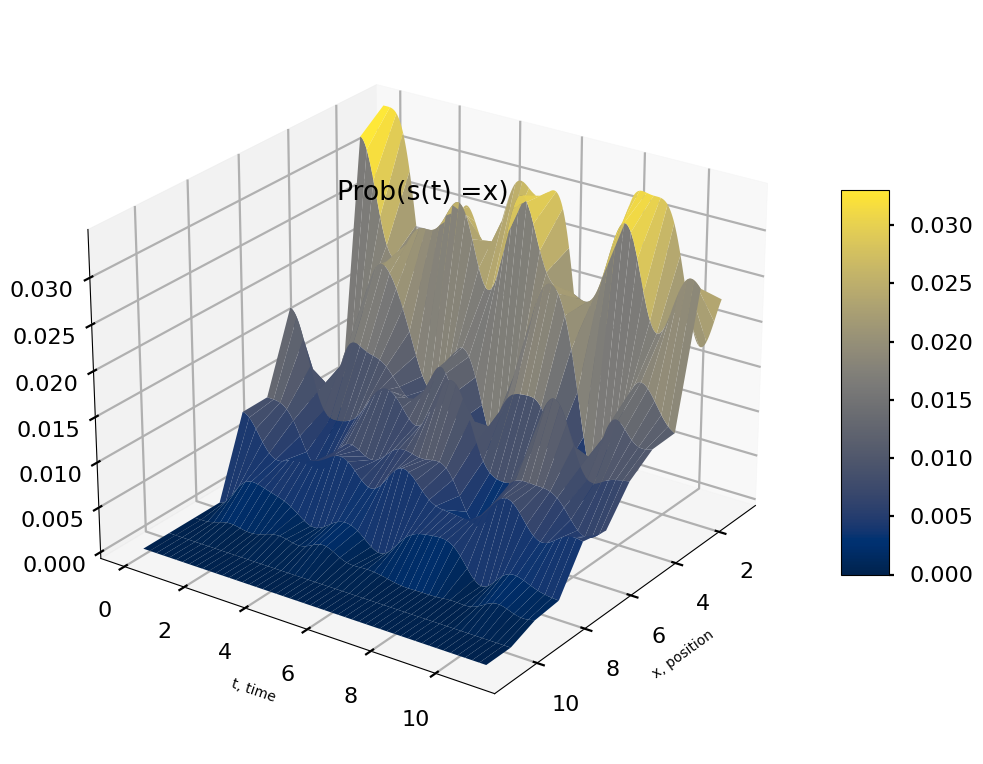

In [66]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(X1, T1, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x, position', labelpad=15)
ax.set_ylabel('t, time', labelpad=15) 
#ax.set_zlabel('z', labelpad=20)

ax.set_title('Prob(s(t) =x)', y=1.0, pad=-94)

fig.colorbar(surf, shrink=0.5, aspect=8)

ax.view_init(25, 35)

plt.show()

### Expected gap function

In [77]:
def Avg_gap(y1, y2, y3, t, l, d, all_sol):
    gap_avg = [(x+1-y1)*Prob_gap3(x+1, t, y1,y2, y3, l, d, all_sol) for x in range(l)]
    return sum(gap_avg)

In [78]:
Avg_gap(y1, y2, y3, 0, l, d, all_sol)

1.5043502366343192e-29

### Plotting expected gap

In [79]:
k=10
l=2*k+1
d=0.1
y1=k
y2=k+1
y3= k+3

In [80]:
trails=100
all_sol = [sol_sys(l, d, k1, k2, trails) for k1 in range(l) for k2 in range(l) if k1 != k2]

In [81]:
T = np.arange(0, k, 0.01)
X = [Avg_gap(y1, y2, t, l, d, all_sol) for t in T]
print(X)

[-2.718771353150327e-28, -9.999499194518301e-05, -0.00039991988448933875, -0.0008995945279669685, -0.00159871900671883, -0.0024968741389080605, -0.0035935221745476793, -0.004888007690030814, -0.006379558676975383, -0.008067287822722636, -0.009950193979363616, -0.012027163817713031, -0.014296973662204636, -0.016758291502251197, -0.019409679175191437, -0.022249594715543004, -0.025276394864892218, -0.02848833773637869, -0.03188358562738046, -0.03546020797366928, -0.03921618443799309, -0.04314940812574757, -0.04725768892012662, -0.051538756928892274, -0.055990266034679076, -0.060609797540542826, -0.0653948639022866, -0.07034291253894223, -0.07545132971265478, -0.08071744446911701, -0.08613853262961763, -0.0917118208257158, -0.09743449056752786, -0.1033036823366069, -0.10931649969441941, -0.11547001339747168, -0.12176126551021012, -0.1281872735069137, -0.1347450343539228, -0.14143152856368413, -0.1482437242122643, -0.15517858091216674, -0.16223305373250013, -0.1694040970587722, -0.176688668

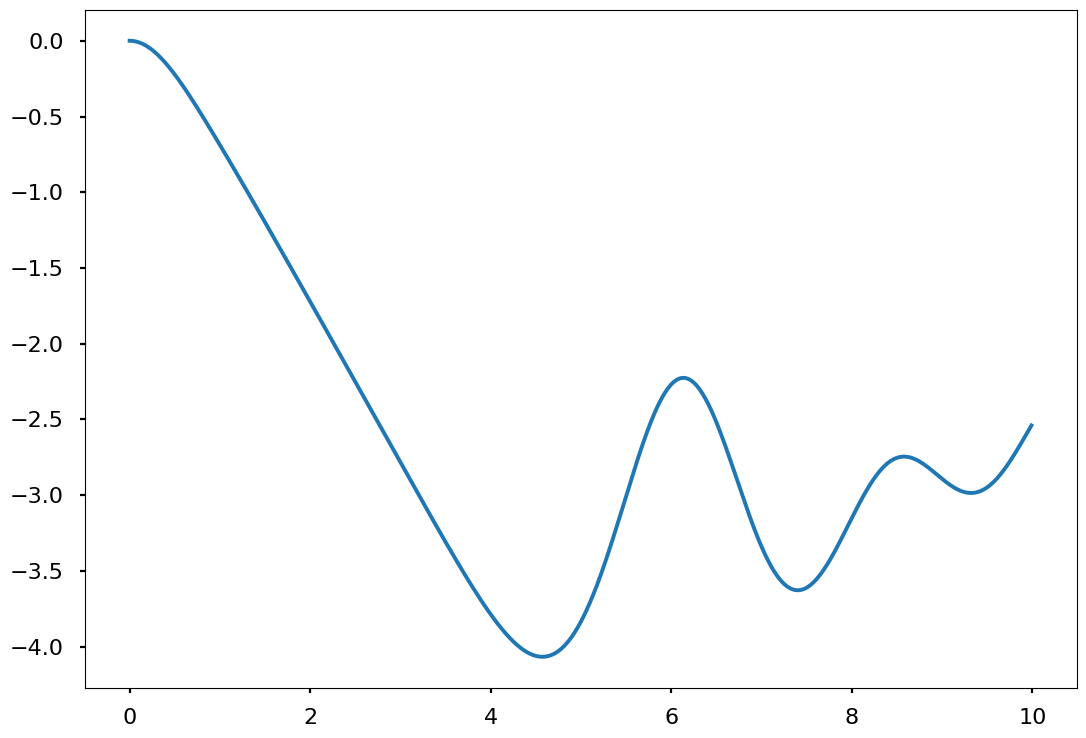

In [82]:
plt.plot(T, X)